## Group 2

## Faitness & Bias in Adult Income Dataset

In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [158]:
df = pd.read_csv("/Users/suchitrahallikeri/Downloads/adult.csv")

# Strip spaces in object columns (Adult dataset often has extra spaces)
for c in df.select_dtypes(include="object").columns:
    df[c] = df[c].astype(str).str.strip()

# Replace '?' with NaN
df.replace("?", np.nan, inplace=True)

df.head()


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [159]:
df.tail()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


## EDA

In [161]:
print("Shape:", df.shape)
df.info()


Shape: (48842, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       46033 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   47985 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [162]:
# Replace "?" with np.nan across the entire DataFrame
df.replace("?", np.nan, inplace=True)

In [163]:
df.isna().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [164]:
# List of non-useful columns
non_useful_columns_for_used_algorithms = ['fnlwgt', 'education']
df_1 = df.copy()
df_1.drop(non_useful_columns_for_used_algorithms, axis=1, inplace=True)

df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   educational-num  48842 non-null  int64 
 3   marital-status   48842 non-null  object
 4   occupation       46033 non-null  object
 5   relationship     48842 non-null  object
 6   race             48842 non-null  object
 7   gender           48842 non-null  object
 8   capital-gain     48842 non-null  int64 
 9   capital-loss     48842 non-null  int64 
 10  hours-per-week   48842 non-null  int64 
 11  native-country   47985 non-null  object
 12  income           48842 non-null  object
dtypes: int64(5), object(8)
memory usage: 4.8+ MB


In [165]:
df[target_col].value_counts()


income
<=50K    37155
>50K     11687
Name: count, dtype: int64

In [166]:
df_clean = df.copy()

# Strip spaces in string columns (important for Adult dataset)
for col in df_clean.select_dtypes(include="object").columns:
    df_clean[col] = df_clean[col].astype(str).str.strip()

# Replace '?' with np.nan (missing)
df_clean = df_clean.replace("?", np.nan)

df_clean.isna().sum().sort_values(ascending=False).head(10)


age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
dtype: int64

In [167]:
df.shape

(48842, 15)

In [168]:
if "sex" in df.columns and "gender" not in df.columns:
    df = df.rename(columns={"sex": "gender"})
    


In [169]:
if "income" not in df.columns:
    df = df.rename(columns={df.columns[-1]: "income"})


In [229]:
gender_income_rate = (
    df.groupby("gender")["income"]
    .apply(lambda s: (s == ">50K").mean()*100)
)

gender_income_rate

gender
Female    10.925148
Male      30.376723
Name: income, dtype: float64

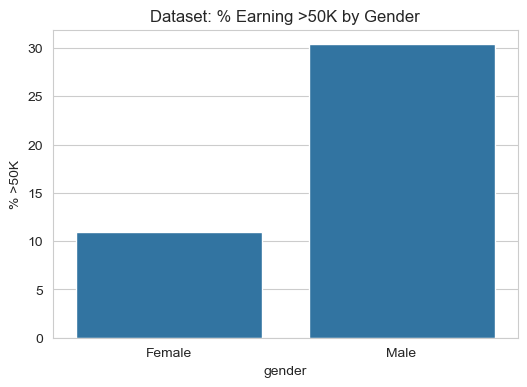

In [231]:
plt.figure(figsize=(6,4))
sns.barplot(x=gender_income_rate.index, y=gender_income_rate.values)
plt.title("Dataset: % Earning >50K by Gender")
plt.ylabel("% >50K")
plt.show()

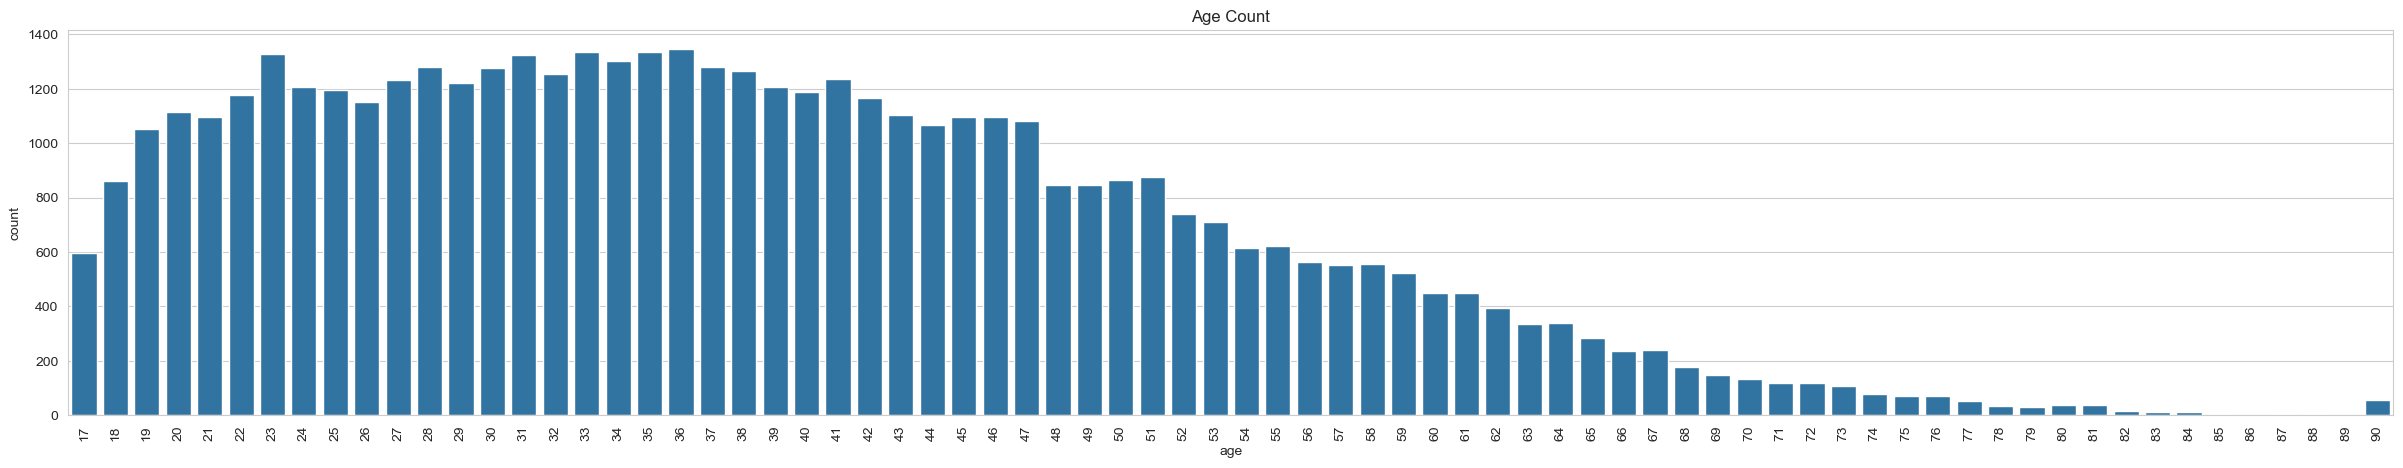

In [170]:
plt.figure(figsize=(30,5))
sns.countplot(x="age", data=df)
plt.title("Age Count")
plt.xticks(rotation=90)
plt.show()


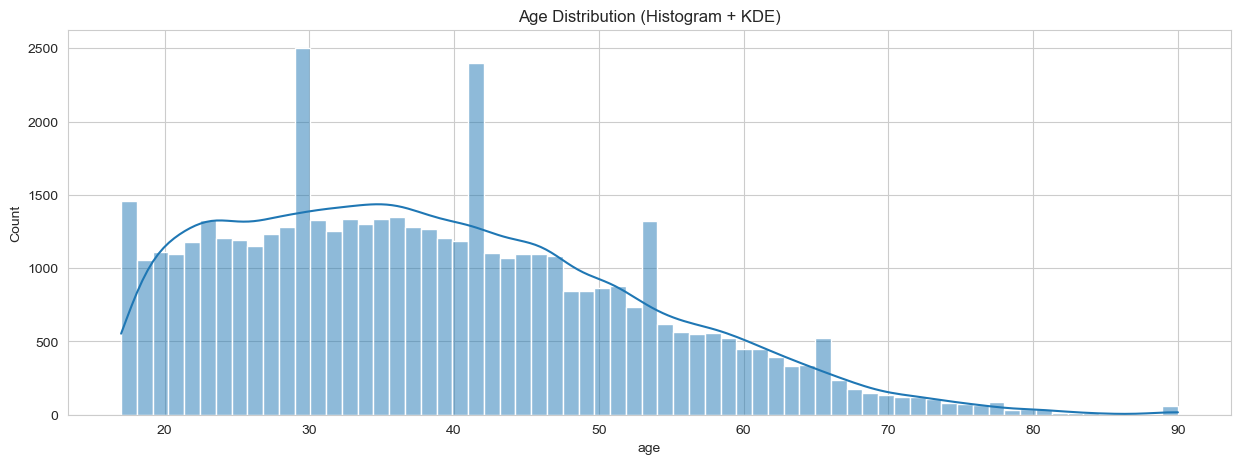

In [171]:
plt.figure(figsize=(15,5))
sns.histplot(x="age", data=df, kde=True)
plt.title("Age Distribution (Histogram + KDE)")
plt.show()


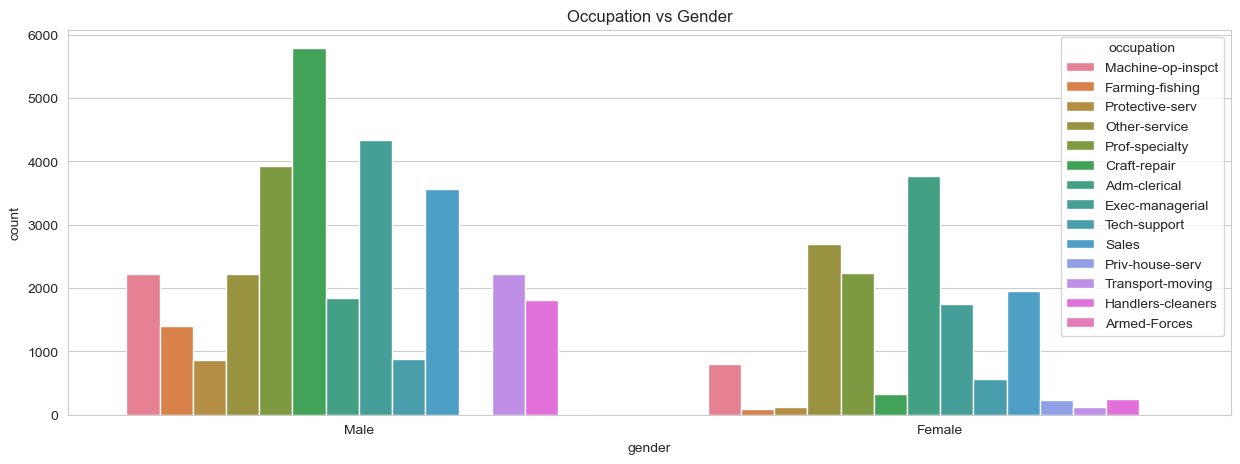

In [176]:
plt.figure(figsize=(15,5))
sns.countplot(data=df, x="gender", hue="occupation")
plt.title("Occupation vs Gender")
plt.xticks(rotation=0)
plt.show()


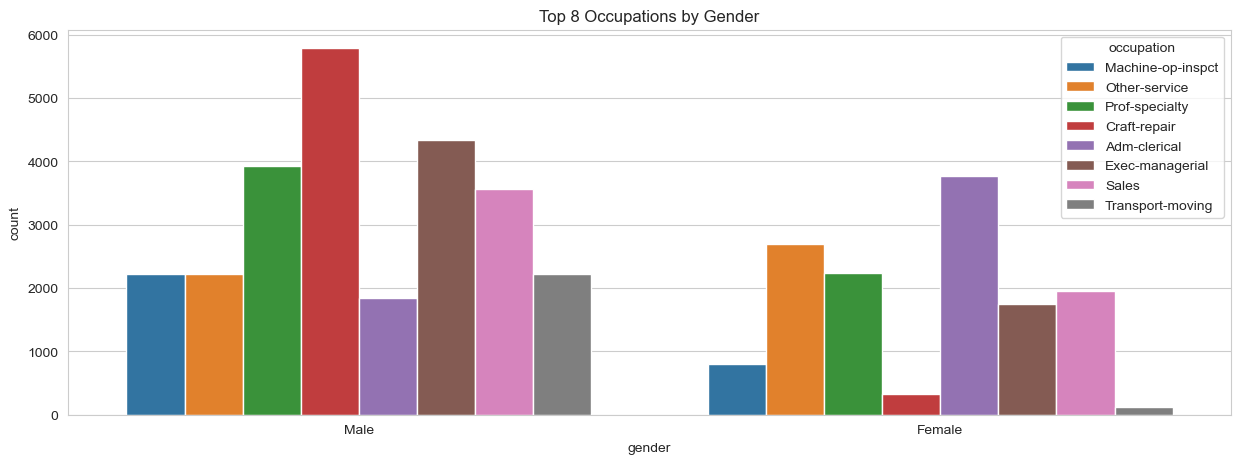

In [177]:
top_occ = df["occupation"].value_counts().head(8).index
df_top = df[df["occupation"].isin(top_occ)]

plt.figure(figsize=(15,5))
sns.countplot(data=df_top, x="gender", hue="occupation")
plt.title("Top 8 Occupations by Gender")
plt.show()


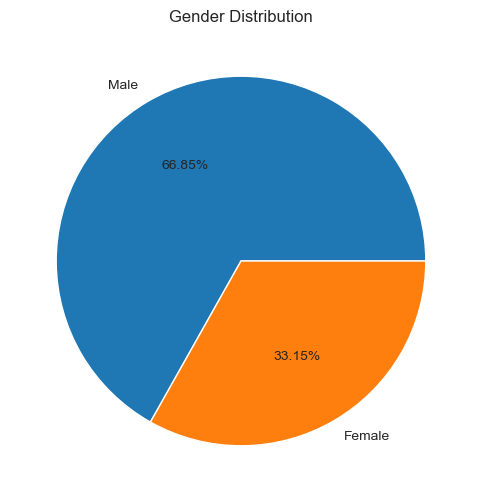

In [178]:
plt.figure(figsize=(6,6))
plt.pie(
    df["gender"].value_counts(),
    labels=df["gender"].value_counts().index,
    autopct="%.2f%%"
)
plt.title("Gender Distribution")
plt.show()


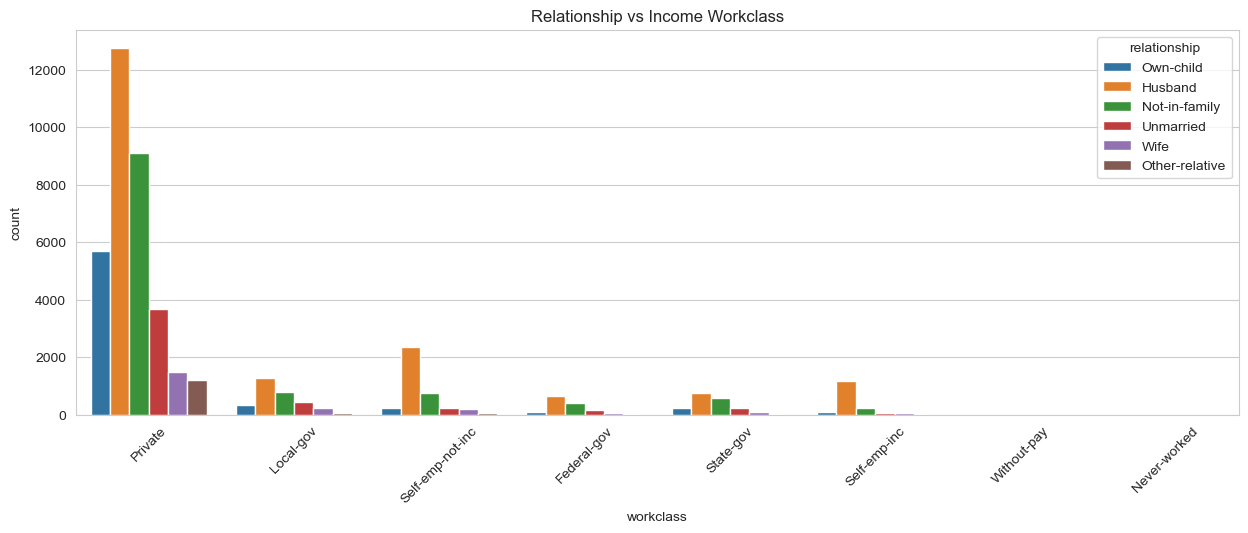

In [179]:
plt.figure(figsize=(15,5))
sns.countplot(x="workclass", hue="relationship", data=df)
plt.title("Relationship vs Income Workclass")
plt.xticks(rotation=45)
plt.show()


## Data Processing 

In [181]:
log_reg_model = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", LogisticRegression(max_iter=200))
])

log_reg_model.fit(X_train, y_train)

pred_lr = log_reg_model.predict(X_test)

print("LogReg Accuracy:", accuracy_score(y_test, pred_lr))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, pred_lr))
print("\nClassification Report:\n", classification_report(y_test, pred_lr))


LogReg Accuracy: 0.8490469358475098

Confusion Matrix:
 [[6901  521]
 [ 952 1384]]

Classification Report:
               precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      7422
        >50K       0.73      0.59      0.65      2336

    accuracy                           0.85      9758
   macro avg       0.80      0.76      0.78      9758
weighted avg       0.84      0.85      0.84      9758



In [182]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC


In [183]:
from xgboost import XGBClassifier


In [184]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=300),
    "KNN (k=7)": KNeighborsClassifier(n_neighbors=7),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=300, random_state=42, n_jobs=-1),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "SVM (RBF)": SVC(kernel="rbf")  # note: can be slower on large data
}

# Add XGBoost if available
if 'has_xgb' in globals() and has_xgb:
    models["XGBoost"] = XGBClassifier(
        n_estimators=400,
        learning_rate=0.05,
        max_depth=4,
        subsample=0.9,
        colsample_bytree=0.9,
        eval_metric="logloss",
        random_state=42
    )

results = []

for name, model in models.items():
    pipe = Pipeline(steps=[
        ("preprocess", preprocess),
        ("model", model)
    ])
    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)
    acc = accuracy_score(y_test, preds)
    results.append((name, acc))

results_df = pd.DataFrame(results, columns=["Model", "Accuracy"]).sort_values(by="Accuracy", ascending=False)
results_df


,Model,Accuracy
4,Gradient Boosting,0.864624
5,SVM (RBF),0.855708
3,Random Forest,0.853044
0,Logistic Regression,0.849047
1,KNN (k=7),0.834700
2,Decision Tree,0.815126


In [185]:
best_model_name = results_df.iloc[0]["Model"]
best_model_name


'Gradient Boosting'

In [186]:
best_estimator = models[best_model_name]

best_pipe = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", best_estimator)
])

best_pipe.fit(X_train, y_train)
best_preds = best_pipe.predict(X_test)

print("Best Model:", best_model_name)
print("Accuracy:", accuracy_score(y_test, best_preds))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, best_preds))
print("\nClassification Report:\n", classification_report(y_test, best_preds))


Best Model: Gradient Boosting
Accuracy: 0.8646238983398238

Confusion Matrix:
 [[7040  382]
 [ 939 1397]]

Classification Report:
               precision    recall  f1-score   support

       <=50K       0.88      0.95      0.91      7422
        >50K       0.79      0.60      0.68      2336

    accuracy                           0.86      9758
   macro avg       0.83      0.77      0.80      9758
weighted avg       0.86      0.86      0.86      9758

